<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

#### 1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [339]:
# Считываем данные в переменную hh_data
hh_data = pd.read_csv('data/hh_database.csv', delimiter=';')

#### 2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [340]:
# Выведем первые 3 строки считанных данных
hh_data.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


#### 3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

In [343]:
# Выведем основную информацию о содержимом датасета
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

#### 4. Обратите внимание на информацию о числе непустых значений

### Заметим, что признаки "Опыт работы", "Последнее/нынешнее место работы", "Последняя/нынешняя должность" содержат пропуски

#### 5. Выведите основную статистическую информацию о столбцах.


In [344]:
# Выведем основную статистическую информацию о признаках
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Московский технически...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

#### 1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [349]:
# Создадим функцию для выделения из признака "Образование и ВУЗ" информации об уровне образования
def education_sep(value):
    education_list = value.split()
    if education_list[0] == 'Высшее':
        return 'высшее'
    elif education_list[0] == 'Неоконченное' and education_list[1] == 'высшее':
        return 'неоконченное высшее'
    elif education_list[0] == 'Среднее' and education_list[1] == 'специальное':
        return 'среднее специальное'
    elif education_list[0] == 'Среднее':
        return 'среднее'
    else:
        return 'не определено' #такого не оказалось, но для полноты картины оставил и это


# Данные с новыми признаками будем хранить в копии датасета
hh_df = hh_data.copy() 

# Создадим новый признак "Образование" и удалим более ненужный признак "Образование и ВУЗ"
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(education_sep)
hh_df = hh_df.drop('Образование и ВУЗ', axis=1)

#### 2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [350]:
# Создадим функцию для выделения из признака "Пол, возраст" информации о поле соискателя
def sex_sep(value):
    sex_list = value.split() #формат ['Мужчина', ',', '60', 'лет', ',', 'родился', '20', 'марта', '1959']
    if sex_list[0] == 'Мужчина':
        return 'М'
    elif sex_list[0] == 'Женщина':
        return 'Ж'
    else:
        return 'Не определено' #надеюсь, такого не будет


# Создадим функцию для выделения из признака "Пол, возраст" информации о возрасте соискателя
def age_sep(value):
    age_list = value.split()
    return int(age_list[2])


# Создадим новые признаки "Пол" и "Возраст" и удалим более ненужный признак "Пол, возраст"
hh_df['Пол'] = hh_df['Пол, возраст'].apply(sex_sep)
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(age_sep)
hh_df = hh_df.drop('Пол, возраст', axis=1)

#### 3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [351]:
# Для дальнейшей обработки временно заменим пропуски в признаке "Опыт работы" на нули
hh_df['Опыт работы'] = hh_df['Опыт работы'].fillna(0)


#Создадим функцию для выделения из признака "Опыт работы" информации об опыте в годах + месяцах и переведем опыт в месяцы 
def work_sep(value):
    if value == 0:
        return np.NaN
    else:
        exclude_list_year = ['год', 'года', 'лет']
        exclude_list_month = ['месяц', 'месяца', 'месяцев', 'мес']
        value_string = value[:40]
        value_list = value_string.split()
        
        # Выделяем годы
        year_index = 0
        years = 0
        for year_word in exclude_list_year:
            if year_word in value_list:
                year_index = int(value_list.index(year_word)) - 1
                years = int(value_list[year_index])
        
        # Выделяем месяцы
        month_index = 0
        months = 0      
        for month_word in exclude_list_month:
            if month_word in value_list:
                month_index = int(value_list.index(month_word)) - 1
                months = int(value_list[month_index])
        
        # Возвращаем итоговое число месяцев        
        return years*12 + months     


# Создадим новый признак "Опыт работы (месяц)" и удалим более ненужный признак "Опыт работы"
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(work_sep)
hh_df = hh_df.drop('Опыт работы', axis=1)

In [352]:
#Удостоверимся, что пропусков осталось столько же, сколько и в изначальном датафрейме
hh_data['Опыт работы'].isna().sum() == hh_df['Опыт работы (месяц)'].isna().sum()

True

#### 4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [353]:
# Создадим функцию для выделения из признака "Город, переезд, командировки" информации о городе соискателя
def city_sep(value):
    cities_top = ['Москва', 'Санкт-Петербург']
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    value_list = value.split()
    target_city = value_list[0]
    
    if target_city in cities_top:
        return target_city
    elif target_city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'


# Создадим функцию для выделения из признака "Город, переезд, командировки" информации о готовности соискателя к переезду
def transfer_sep(value):
    exclude_list = ['не готов', 'не готова', 'нет', 'не хочу', 'не буду', 'не могу', 'не собираюсь', 'нет возможности', 'нет желания']
    position = value.find('перее')
    mark = 0
    if position == -1:  # возвращается -1, если не находится нужное значение
        mark = 0        # по умолчанию считаем, что соискатель готов к переезду (если не указано обратного)
    else:
        new_string = value[:position]
        for word in exclude_list:
            if new_string.find(word) > 0:
                mark += 1
    if mark > 0:
        return False
    else:
        return True


# Создадим функцию для выделения из признака "Город, переезд, командировки" информации о готовности соискателя к командировкам   
def trip_sep(value):
    exclude_list = ['не готов', 'не готова', 'нет', 'не хочу', 'не буду', 'не могу', 'не собираюсь', 'нет возможности', 'нет желания']
    position_transfer = value.find('перее')
    position_trip = value.find('командиро')
    mark = 0
    if position_trip == -1: # возвращается -1, если не находится нужное значение. Но вроде бы такого быть не должно
        mark = 0            # по умолчанию считаем, что соискатель готов к командировкам (если не указано обратного)
    else:
        new_string = value[position_transfer:position_trip]
        for word in exclude_list:
            if new_string.find(word) > 0:
                mark += 1
    if mark > 0:
        return False
    else:
        return True


# Создадим новые признаки "Город", "Готовность к переезду", "Готовность к командировкам" и удалим более ненужный признак "Город, переезд, командировки"  
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(city_sep)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(transfer_sep)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(trip_sep)
hh_df = hh_df.drop('Город, переезд, командировки', axis=1)

#### 5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [354]:
# Создадим функцию для выделения из признака "Занятость" информации об интересующих соискателя категориях занятости
def busyness_sep(value):
    full_busy = False   #полная занятость
    part_busy = False   #частичная занятость
    proect_busy = False #проектная работа
    intern_busy = False #стажировка
    volunt_busy = False #волонтерство
    
    if value.find('полная занятость') != -1:
        full_busy = True
    if value.find('частичная занятость') != -1:
        part_busy = True
    if value.find('проектная работа') != -1:
        proect_busy = True
    if value.find('стажировка') != -1:
        intern_busy = True
    if value.find('волонтерство') != -1:
        volunt_busy = True
        
    return full_busy, part_busy, proect_busy, intern_busy, volunt_busy


# Создадим функцию для выделения из признака "График" информации об интересующих соискателя категориях графика работы
def schedule_sep(value):
    full_schedule = False   #полный день
    shift_schedule  = False #сменный график
    flex_schedule = False   #гибкий график
    remote_schedule = False #удалённая работа
    vaht_schedule = False   #вахтовый метод
    
    if value.find('полный день') != -1:
        full_schedule = True
    if value.find('сменный график') != -1:
        shift_schedule = True
    if value.find('гибкий график') != -1:
        flex_schedule = True
    if value.find('удаленная работа') != -1:
        remote_schedule = True
    if value.find('вахтовый метод') != -1:
        vaht_schedule = True
    
    return full_schedule, shift_schedule, flex_schedule, remote_schedule, vaht_schedule


# Создадим новые признаки, соответствующие методу преобразования "One Hot Encoding" и удалим более ненужные признаки "Занятость" и "График"
hh_df['Полная занятость'], hh_df['Частичная занятость'], hh_df['Проектная работа'], hh_df['Стажировка'], hh_df['Волонтерство'] = zip(*hh_df['Занятость'].apply(busyness_sep))
hh_df['Полный день'], hh_df['Сменный график'], hh_df['Гибкий график'], hh_df['Удаленная работа'], hh_df['Вахтовый метод'] = zip(*hh_df['График'].apply(schedule_sep))
hh_df = hh_df.drop(['Занятость', 'График'], axis=1)

#### 6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [355]:
# Считываем таблицу с курсами валют
currency_df = pd.read_csv('data/ExchangeRates.csv')

# Приводим поле 'Обновление резюме' к формату datetime, выделяем оттуда дату. В таблице с валютами поле с датой тоже приводим к datetime
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'])
hh_df['Дата'] = hh_df['Обновление резюме'].dt.date
hh_df['Дата'] = pd.to_datetime(hh_df['Дата'])
currency_df['date'] = pd.to_datetime(currency_df['date'])

#Функция для обработки поля с зарплатой, возвращающая сумму ЗП и валюту в формате ISO
def salary_sep(value):
    salary_list = value.split()
    salary = int(salary_list[0])
    currency_old = salary_list[1]
    
    currency_new = currency_old.replace('.', '')
    currency_dict = {
        'руб': 'RUB',
        'грн': 'UAH',
        'USD': 'USD',
        'EUR': 'EUR',
        'белруб': 'BYN',
        'KGS': 'KGS',
        'сум': 'UZS',
        'AZN': 'AZN',
        'KZT': 'KZT', 
    }
    currency = currency_dict[currency_new]
    
    return salary, currency

#Создаем столбцы с суммой и валютой
hh_df['Сумма'], hh_df['Валюта'] = zip(*hh_df['ЗП'].apply(salary_sep))

#Удаляем из таблицы с валютами ненужные поля (для небольшой экономии памяти при будущем соединении)
currency_df = currency_df.drop(['per', 'time', 'vol'], axis=1)

#Присоединяем к основной таблице таблицу с валютами. Соединение левое, чтобы не потерять строки с рублями
hh_df = hh_df.merge(
    currency_df,
    left_on=['Дата', 'Валюта'],
    right_on=['date', 'currency'],
    how='left'
)

#Заполняем пропуски (строки с рублевой валютой) в полях с ценой закрытия и пропорцией на 1
hh_df['close'] = hh_df['close'].fillna(1)
hh_df['proportion'] = hh_df['proportion'].fillna(1)

#Создаем поле с итоговой ЗП соискателя в рублях
hh_df['ЗП (руб)'] = hh_df['Сумма'] * hh_df['close'] / hh_df['proportion']

#Удаляем более ненужные столбцы
hh_df = hh_df.drop(['ЗП', 'Сумма', 'Валюта', 'Дата', 'date', 'currency', 'close', 'proportion'], axis=1)

#Выведем медианную ЗП для задания 3.6
hh_df['ЗП (руб)'].median()

59019.0

# Исследование зависимостей в данных

#### 1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

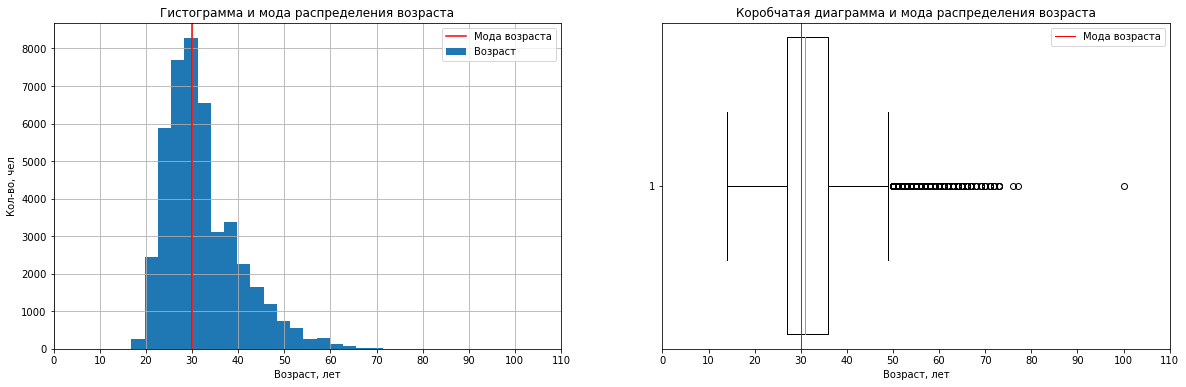

In [358]:
# Гистограмма и коробчатая диаграмма распределения возраста соискателей
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Гистограмма
axes[0].hist(
    x=hh_df['Возраст'],
    label='Возраст',
    bins=30
)
axes[0].axvline(
    x=int(hh_df['Возраст'].mode()),
    label='Мода возраста',
    color='red'
)
axes[0].set_xticks(range(0, 120, 10))
axes[0].set_title('Гистограмма и мода распределения возраста')
axes[0].set_xlabel('Возраст, лет')
axes[0].set_ylabel('Кол-во, чел')
axes[0].legend()
axes[0].grid()

# Коробчатая диаграмма
axes[1].boxplot(
    hh_df['Возраст'],
    vert=False,
    widths=2
)
axes[1].axvline(
    x=int(hh_df['Возраст'].mode()),
    label='Мода возраста',
    linewidth=1,
    color='red'
)
axes[1].set_xticks(range(0, 120, 10))
axes[1].set_title('Коробчатая диаграмма и мода распределения возраста')
axes[1].set_xlabel('Возраст, лет')
axes[1].legend();

In [357]:
print(f"Мода возраста соискателей = {int(hh_df['Возраст'].mode())} лет")
print(f"Минимальный возраст соискателей = {int(hh_df['Возраст'].min())} лет")
print(f"Максимальный возраст соискателей = {int(hh_df['Возраст'].max())} лет")

Мода возраста соискателей = 30 лет
Минимальный возраст соискателей = 14 лет
Максимальный возраст соискателей = 100 лет


## Выводы по графикам:
### 1. Модальное значение возраста соискателей равно 30 годам
### 2. Возраст соискателей распределен между 14 и 100 годами, большинство соискателей с возрастом примерно от 27 до 36 лет
### 3. По коробчатой диаграмме аномальными оказались возраста больше 50 лет. Есть один соискатель с возрастом 100 лет. Видимо, какой-то шутник

#### 2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

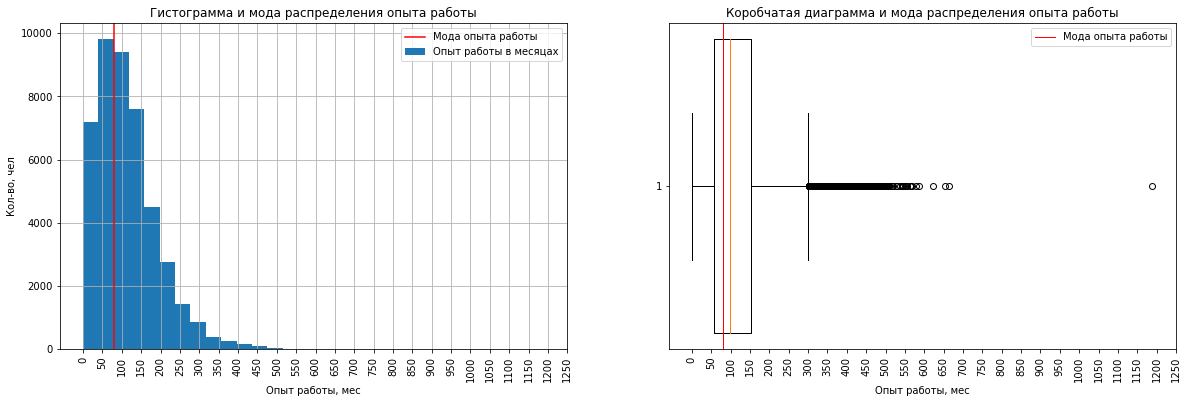

In [360]:
# Гистограмма и коробчатая диаграмма распределения опыта соискателей (в месяцах)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Гистограмма
axes[0].hist(
    x=hh_df['Опыт работы (месяц)'],
    label='Опыт работы в месяцах',
    bins=30
)
axes[0].axvline(
    x=int(hh_df['Опыт работы (месяц)'].mode()),
    label='Мода опыта работы',
    color='red'
)
axes[0].set_xticks(range(0, 1300, 50))
axes[0].set_title('Гистограмма и мода распределения опыта работы')
axes[0].set_xlabel('Опыт работы, мес')
axes[0].set_ylabel('Кол-во, чел')
axes[0].xaxis.set_tick_params(rotation=90) 
axes[0].legend()
axes[0].grid()

# Коробчатая диаграмма
axes[1].boxplot(
    hh_df['Опыт работы (месяц)'].fillna(0),
    vert=False,
    widths=0.9
)
axes[1].axvline(
    x=int(hh_df['Опыт работы (месяц)'].mode()),
    label='Мода опыта работы',
    linewidth=1,
    color='red'
)
axes[1].set_xticks(range(0, 1300, 50))
axes[1].set_title('Коробчатая диаграмма и мода распределения опыта работы')
axes[1].set_xlabel('Опыт работы, мес')
axes[1].xaxis.set_tick_params(rotation=90) 
axes[1].legend();

In [138]:
print(f"Мода опыта работы соискателей = {int(hh_df['Опыт работы (месяц)'].mode())} мес")
print(f"Минимальный опыт работы соискателей = {int(hh_df['Опыт работы (месяц)'].min())} мес")
print(f"Максимальный опыт работы соискателей = {int(hh_df['Опыт работы (месяц)'].max())} мес")

Мода опыта работы соискателей = 81 мес
Минимальный опыт работы соискателей = 0 мес
Максимальный опыт работы соискателей = 1188 мес


## Выводы по графикам:
### 1. Модальное значение опыта работы соискателей равно 81 месяц (почти 7 лет)
### 2. Опыт работы соискателей распределен между 0 и 1188 месяцев, большинство соискателей с опытом работы примерно от 50 до 150 месяцев
### 3. По коробчатой диаграмме аномальными оказались значения опыта работы больше 300 месяцев (25 лет). Есть один соискатель с опытом почти 1200 месяцев, то есть 100 лет

#### 3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


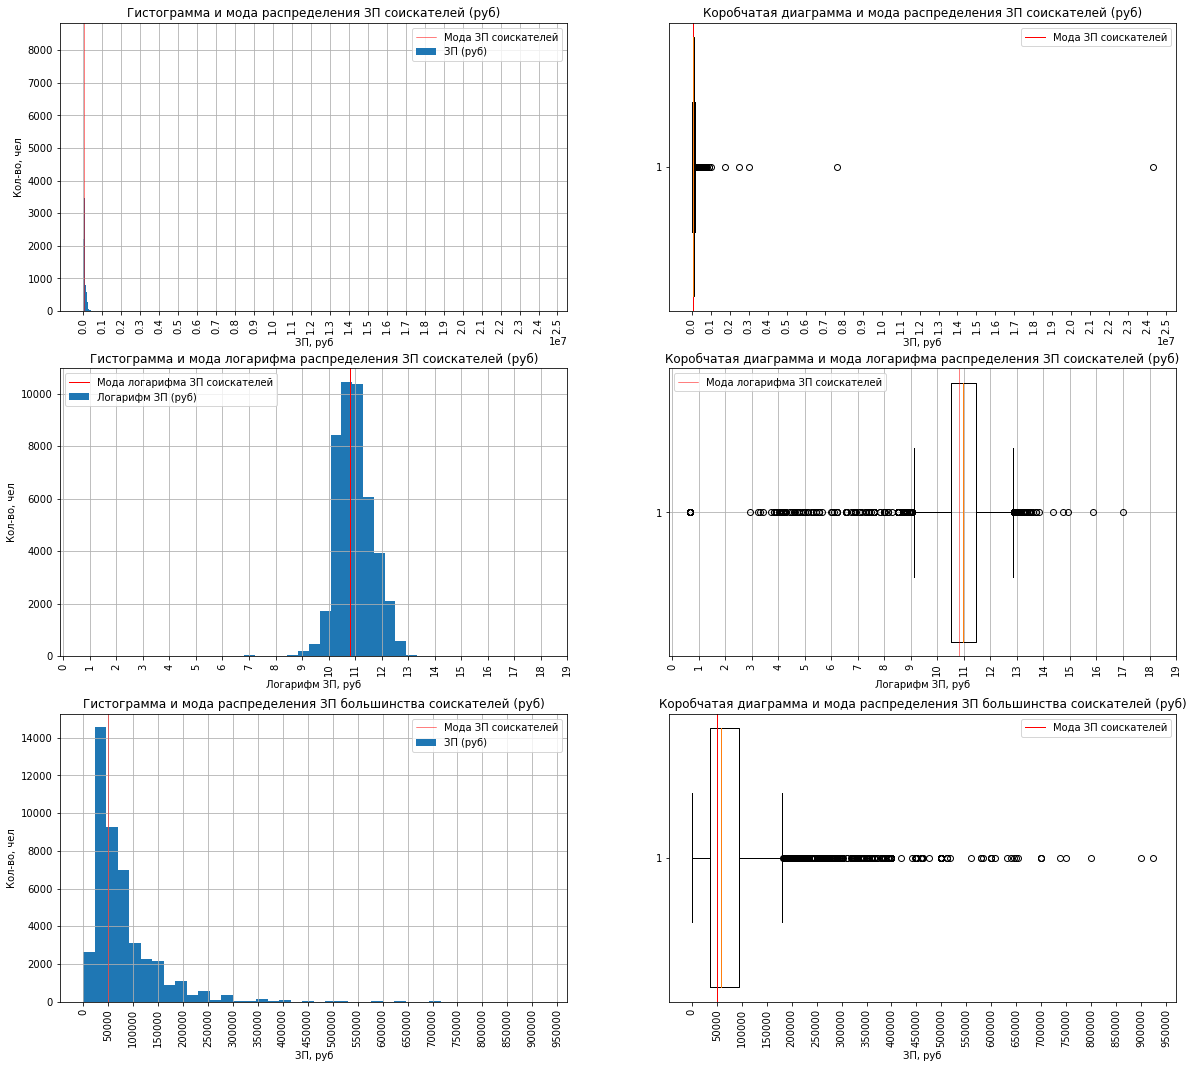

In [381]:
# Гистограммы и коробчатые диаграммы распределения ЗП соискателей (в рублях)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))

# Гистограмма распределения ЗП
axes[0][0].hist(
    x=hh_df['ЗП (руб)'],
    label='ЗП (руб)',
    bins=2000
)
axes[0][0].axvline(
    x=int(hh_df['ЗП (руб)'].mode()),
    linewidth=0.5,
    label='Мода ЗП соискателей',
    color='red'
)
axes[0][0].set_xticks(range(0, 26000000, 1000000))
axes[0][0].set_title('Гистограмма и мода распределения ЗП соискателей (руб)')
axes[0][0].set_xlabel('ЗП, руб')
axes[0][0].set_ylabel('Кол-во, чел')
axes[0][0].xaxis.set_tick_params(rotation=90) 
axes[0][0].legend()
axes[0][0].grid()

# Коробчатая диаграмма распределения ЗП
axes[0][1].boxplot(
    hh_df['ЗП (руб)'].fillna(0),
    vert=False,
    widths=0.9
)
axes[0][1].axvline(
    x=int(hh_df['ЗП (руб)'].mode()),
    label='Мода ЗП соискателей',
    linewidth=1,
    color='red'
)
axes[0][1].set_xticks(range(0, 26000000, 1000000))
axes[0][1].set_title('Коробчатая диаграмма и мода распределения ЗП соискателей (руб)')
axes[0][1].set_xlabel('ЗП, руб')
axes[0][1].xaxis.set_tick_params(rotation=90) 
axes[0][1].legend()

#############################################################################################################

# Гистограмма распределения логарифма ЗП
axes[1][0].hist(
    x=np.log(hh_df['ЗП (руб)']+1),
    label='Логарифм ЗП (руб)',
    bins=40
)
axes[1][0].axvline(
    x=float(np.log(hh_df['ЗП (руб)']).mode()),
    linewidth=1,
    label='Мода логарифма ЗП соискателей',
    color='red'
)
axes[1][0].set_xticks(range(0, 20, 1))
axes[1][0].set_title('Гистограмма и мода логарифма распределения ЗП соискателей (руб)')
axes[1][0].set_xlabel('Логарифм ЗП, руб')
axes[1][0].set_ylabel('Кол-во, чел')
axes[1][0].xaxis.set_tick_params(rotation=90) 
axes[1][0].legend()
axes[1][0].grid()

# Коробчатая диаграмма распределения логарифма ЗП
axes[1][1].boxplot(
    np.log(hh_df['ЗП (руб)'].fillna(0)+1),
    vert=False,
    widths=0.9
)
axes[1][1].axvline(
    x=float(np.log(hh_df['ЗП (руб)']).mode()),
    label='Мода логарифма ЗП соискателей',
    linewidth=0.5,
    color='red'
)
axes[1][1].set_xticks(range(0, 20, 1))
axes[1][1].set_title('Коробчатая диаграмма и мода логарифма распределения ЗП соискателей (руб)')
axes[1][1].set_xlabel('Логарифм ЗП, руб')
axes[1][1].xaxis.set_tick_params(rotation=90)
axes[1][1].grid()
axes[1][1].legend()

#############################################################################################################

# Гистограмма распределения ЗП для людей с ЗП меньше 1 000 000 руб
axes[2][0].hist(
    x=hh_df[hh_df['ЗП (руб)'] < 1000000]['ЗП (руб)'],
    label='ЗП (руб)',
    bins=40
)
axes[2][0].axvline(
    x=int(hh_df[hh_df['ЗП (руб)'] < 1000000]['ЗП (руб)'].mode()),
    linewidth=0.5,
    label='Мода ЗП соискателей',
    color='red'
)
axes[2][0].set_xticks(range(0, 1000000, 50000))
axes[2][0].set_title('Гистограмма и мода распределения ЗП большинства соискателей (руб)')
axes[2][0].set_xlabel('ЗП, руб')
axes[2][0].set_ylabel('Кол-во, чел')
axes[2][0].xaxis.set_tick_params(rotation=90) 
axes[2][0].legend()
axes[2][0].grid()

# Коробчатая диаграмма распределения ЗП для людей с ЗП меньше 1 000 000 руб
axes[2][1].boxplot(
    hh_df[hh_df['ЗП (руб)'] < 1000000]['ЗП (руб)'].fillna(0),
    vert=False,
    widths=0.9
)
axes[2][1].axvline(
    x=int(hh_df[hh_df['ЗП (руб)'] < 1000000]['ЗП (руб)'].mode()),
    label='Мода ЗП соискателей',
    linewidth=1,
    color='red'
)
axes[2][1].set_xticks(range(0, 1000000, 50000))
axes[2][1].set_title('Коробчатая диаграмма и мода распределения ЗП большинства соискателей (руб)')
axes[2][1].set_xlabel('ЗП, руб')
axes[2][1].xaxis.set_tick_params(rotation=90) 
axes[2][1].legend();

In [362]:
print(f"Мода ЗП соискателей = {int(hh_df['ЗП (руб)'].mode())} ({round(float(np.log(hh_df['ЗП (руб)'].mode())), 1)} в логарифмической шкале) руб")
print(f"Минимальный ЗП соискателей = {int(hh_df['ЗП (руб)'].min())} руб")
print(f"Максимальный ЗП соискателей = {int(hh_df['ЗП (руб)'].max())} руб")

Мода ЗП соискателей = 50000 (10.8 в логарифмической шкале) руб
Минимальный ЗП соискателей = 1 руб
Максимальный ЗП соискателей = 24304876 руб


## Выводы по графикам:
### 1. Из-за того, что в признаке очень большой разброс (от 1 до 24 млн руб), графики с обычными значениями получается совершенно ненаглядными Из-за этого построил 2 отдельных графика с логарифмом этих значений, чтобы можно было сделать хоть какие-то выводы. После этого построил 2 дополнительных графика, отсеяв ЗП больше 1 млн руб
### 2. Модальное значение ЗП соискателей равен 50 000 руб (примерно 10.8 в логарифмической шкале)
### 3. ЗП соискателей распределена между 1 и 24 304 876 руб, большинство соискателей с ЗП примерно от 44 000 руб до 100 000 руб (от 10.7 до 11.5 в логарифмической шкале)
### 4. По коробчатой диаграмме аномальными оказались значения ЗП меньше примерно 8 000 руб (9 по логарифмической шкале) и больше примерно 442 000 руб (13 по логарифмической шкале). Если говорить о соискателях с ожидаемоей ЗП меньше 1 млн руб, то выбросы среди них это люди с ЗП больше примерно 200 000 руб. Есть 5 соискателей с ЗП больше 1.4 млн руб и 1 соискатель с ЗП равной 24 млн

#### 4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

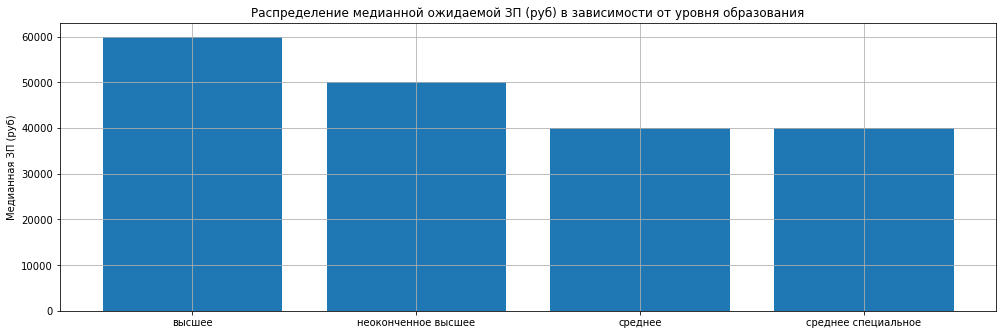

In [363]:
# Столбчатая диаграмма распределения медианной ЗП в зависимости от уровня образования
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0,0,1,1])

axes.bar(
    x=hh_df[hh_df['ЗП (руб)'] < 1000000].groupby('Образование')['ЗП (руб)'].median().index,
    height=hh_df[hh_df['ЗП (руб)'] < 1000000].groupby('Образование')['ЗП (руб)'].median()
)
axes.set_title('Распределение медианной ожидаемой ЗП (руб) в зависимости от уровня образования')
axes.set_ylabel('Медианная ЗП (руб)')
axes.grid();

## Выводы по графику:
### 1. Наибольшая медианная ожидаемая ЗП (60 000 руб) наблюдается у соискателей с высшим образованием. Наименьшее значение у соискателей со средним и средним специальным образованием и равна 40 000 руб
### 2. При прогнозировании признака ЗП, несомненно, необходимо принимать во внимание уровень образования соискателей, так как медианные значения ЗП значительно отличаются (в 1.5 раза для высшего и среднего образования)

#### 5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

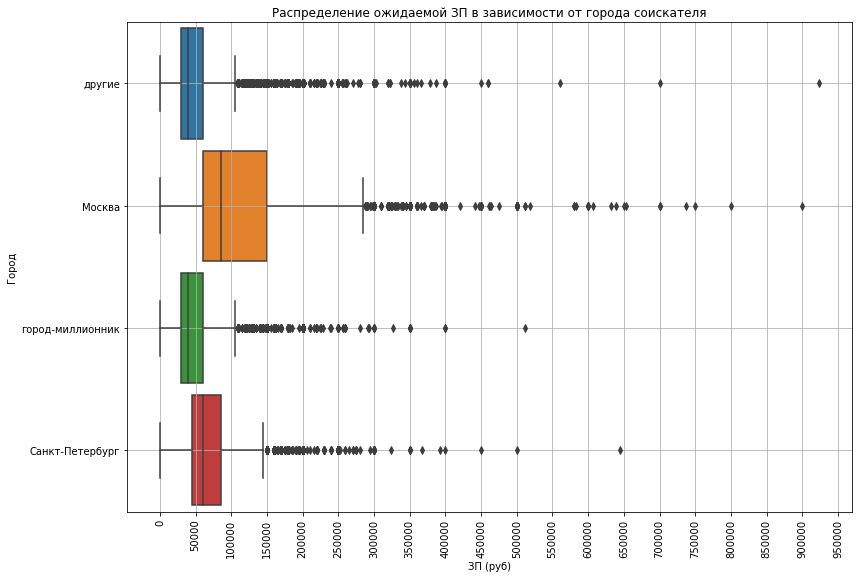

In [364]:
# Коробчатая диаграмма распределения ЗП соискаталей в зависимости от города соискателя
fig = plt.figure(figsize=(13, 9))

boxplot = sns.boxplot(
    data=hh_df[hh_df['ЗП (руб)'] < 1000000],
    y='Город',
    x='ЗП (руб)',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение ожидаемой ЗП в зависимости от города соискателя')
boxplot.set_xticks(range(0, 1000000, 50000))
boxplot.xaxis.set_tick_params(rotation=90) 
boxplot.grid();

## Выводы по графику:
### 1. Наибольшая медианная ожидаемая ЗП, ожидаемо, в Москве, и равна примерно 80 000 руб. Далее идет Санкт-Петербург (примерно 60 000 руб) и остальные города, в том числе города-миллионники, с медианной ЗП равной примерно 45 000 руб
### 2. Такая же картина наблюдается и с размахом ожидаемой ЗП. Наибольший размах в Москве (примерно от 60 000 до 150 000 руб), далее в Санкт-Петербурге (примерно от 40 000 до 85 000 руб), затем в остальных городах, в том числе городах-миллионниках (примерно от 30 000 до 60 000 руб)
### 3. Наибольшая максимальная (в смысле распределения Тьюки) ожидаемая ЗП в Москве, и равна примерно 280 000 руб
### 4. Статистические характеристики для категории "другие города" и "города-миллионники практически идентичны и различаются только в количестве и размахе потенциальных выбросов (в "других городах" потенциальных выбросов больше и они шире)
### 5. Любопытно, что наибольший выброс наблюдается в "других городах", он равен примерно 920 000 руб
### 6. Так как, судя по графику выше, категории "другие города" и "города-миллионники" практически одинаковы, возможно стоит их объединить в одну категорию (однако предварительно проанализировав их более подробно)
### 7. При прогнозировании признака ЗП, несомненно, необходимо принимать во внимание город соискателей, так как все статистические характеристики ЗП сильно отличаются друг от друга в зависимости от города

#### 6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

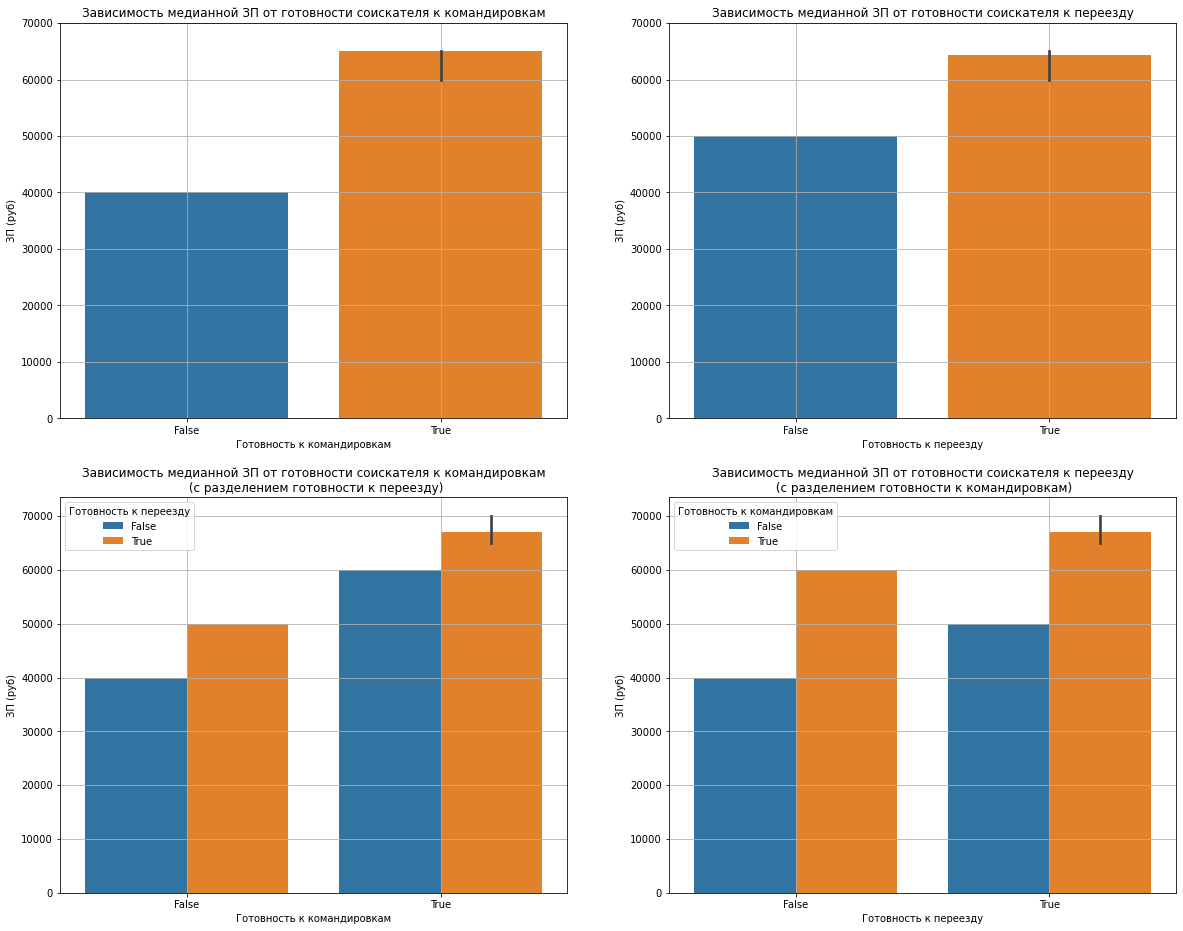

In [366]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,16))

# Столбчатая диаграмма зависимости медианной ЗП соискателей от готовности к командировкам
sns.barplot(
    data=hh_df,
    x='Готовность к командировкам',
    y='ЗП (руб)',
    estimator=np.median,
    ax=axes[0][0] 
)
axes[0][0].set_title('Зависимость медианной ЗП от готовности соискателя к командировкам')
axes[0][0].set_yticks(range(0, 80000, 10000))
axes[0][0].grid()

# Столбчатая диаграмма зависимости медианной ЗП соискателей от готовности к переезду
sns.barplot(
    data=hh_df,
    x='Готовность к переезду',
    y='ЗП (руб)',
    estimator=np.median,
    ax=axes[0][1] 
)
axes[0][1].set_title('Зависимость медианной ЗП от готовности соискателя к переезду')
axes[0][1].set_yticks(range(0, 80000, 10000))
axes[0][1].grid();

###############################################################################################

# Столбчатая диаграмма зависимости медианной ЗП соискателей от готовности к командировках (с разделением готовности к переезду)
sns.barplot(
    data=hh_df,
    x='Готовность к командировкам',
    y='ЗП (руб)',
    hue='Готовность к переезду',
    estimator=np.median,
    ax=axes[1][0] 
)
axes[1][0].set_title('Зависимость медианной ЗП от готовности соискателя к командировкам\n (с разделением готовности к переезду)')
axes[1][0].set_yticks(range(0, 80000, 10000))
axes[1][0].grid()

# Столбчатая диаграмма зависимости медианной ЗП соискателей от готовности к переезду (с разделением готовности к командировкам)
sns.barplot(
    data=hh_df,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    estimator=np.median,
    ax=axes[1][1] 
)
axes[1][1].set_title('Зависимость медианной ЗП от готовности соискателя к переезду\n (с разделением готовности к командировкам)')
axes[1][1].set_yticks(range(0, 80000, 10000))
axes[1][1].grid();

## Выводы по графикам:
### 1. Наибольшая медианная ожидаемая ЗП соискателей в размере 67 000 руб у категории соискателей, готовых и к переезду и к командировкам
### 2. Наименьшая медианная ожидаемая ЗП соискателей в размере 40 000 руб у категории соискателей, не готовых ни к переезду, ни к командировкам
### 3. Эти признаки, а скорее всего их сочетания, так же необходимо учитывать при прогнозировании ЗП соискателей

#### 7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

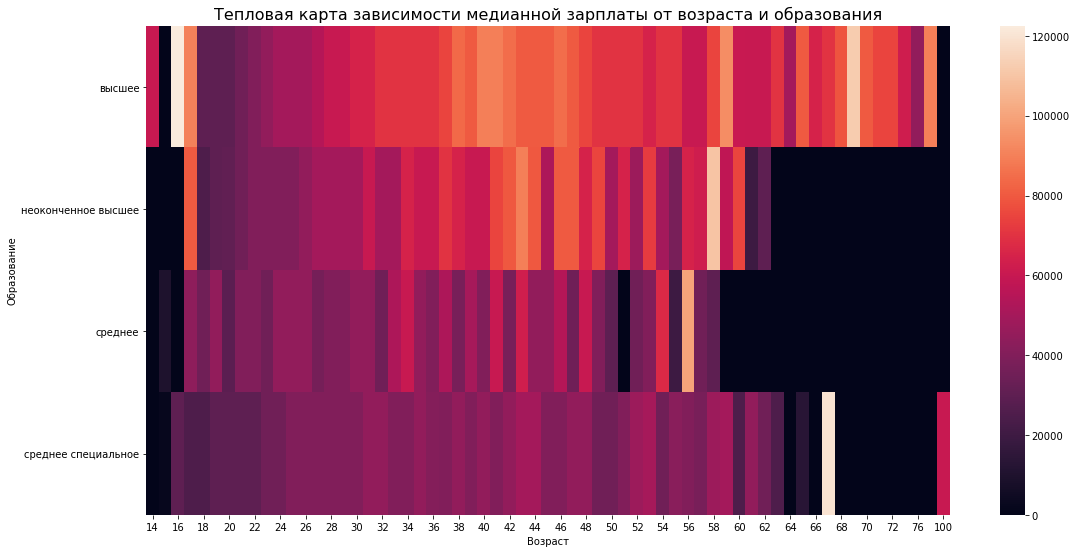

In [367]:
# Сводная таблица медианной ЗП соискателей в зависимости от возраста и образования
pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
    aggfunc='median',
    fill_value=0
)

# Тепловая карта зависимости медианной ЗП соискателей от возраста и образования
fig = plt.figure(figsize=(18, 9))
heatmap = sns.heatmap(
    pivot,
    xticklabels=2
)
heatmap.set_title('Тепловая карта зависимости медианной зарплаты от возраста и образования', fontsize=16)
heatmap.yaxis.set_tick_params(rotation=0) 

## Выводы по графику:
### 1. Как и было показано ранее, наибольшая медианная ожидаемая ЗП у категории соискателей с высшим образованием, - по тепловой карте видно, что почти вдоль всего распределения по возрасту, это значения в среднем выше, чем в других категориях. И становится тем выше, чем больше возраст соискателя. Пик ожидаемой ЗП приходится примерно на 36-48 лет
### 2. Для категории с высшим образованием наблюдаются странные выбросы - есть люди с возрастом меньше 18 лет. Скорее всего, ошибки
### 3. Для категорий с неоконченным высшим, средним и средним специальным образованием есть "предельные" возраста, равные примерно 64, 58 и 68 годам соответственно. Для людей же с высшим образованием, соискатели есть всех возрастов (кроме 100-летнего соискателя, который оказался со средним специальным образованием)

#### 8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

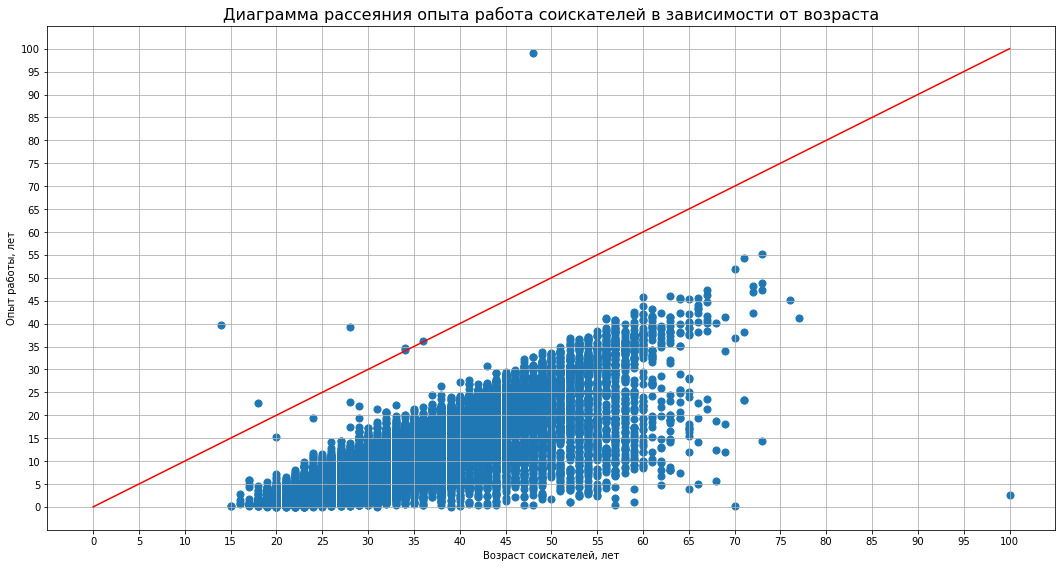

In [368]:
# Диаграмма рассеяния опыта работы соискателей в зависимости от возраста
fig = plt.figure(figsize=(14, 7))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    y=hh_df['Опыт работы (месяц)']/12,
    x=hh_df['Возраст'],
    s=50
)

# Построим диагональ возраста и опыта работы
ident = [0, 100]
axes.plot(
    ident, 
    ident,
    color='red')

axes.set_xticks(range(0, 105, 5))
axes.set_yticks(range(0, 105, 5))
axes.set_title('Диаграмма рассеяния опыта работа соискателей в зависимости от возраста', fontsize=16)
axes.set_ylabel('Опыт работы, лет')
axes.set_xlabel('Возраст соискателей, лет')
axes.grid()

## Выводы по графику:
### 1. Прежде всего, выяснилось, что 100-летний соискатель это не тот же самый человек, что и соискатель с опытом работы 100 лет. Последнему всего около 47 лет
### 2. Видно, что опыт работы планомерно растет с возрастом соискателей (что логично)
### 3. Дополнительно построенная диагональ распределения показывает явные аномалии - 2 (или 3) соискателя имеют опыт работы равный своему возрасту, а 4 человека имеют рабочий стаж больше своего возраста

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


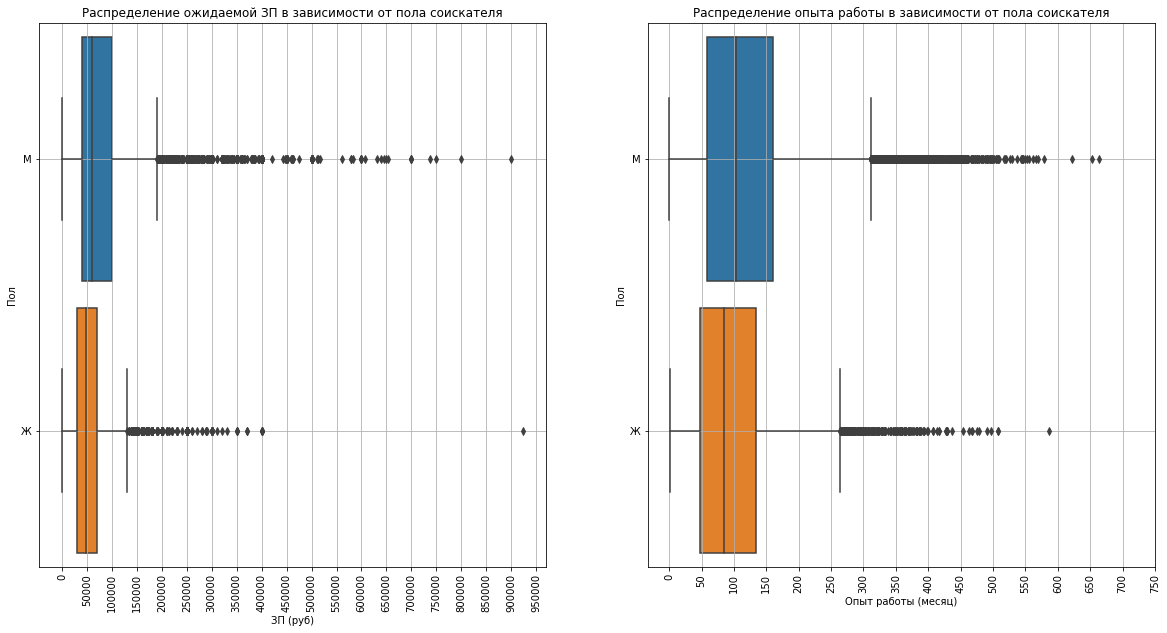

In [369]:
# График зависимости ожидаемой ЗП в зависимости от пола соискателя. Из выборки уберем соискателей с запросами ЗП больше 1 млн руб
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(
    data=hh_df[hh_df['ЗП (руб)'] < 1000000],
    y='Пол',
    x='ЗП (руб)',
    orient='h',
    width=0.9,
    ax=axes[0]
)
axes[0].set_title('Распределение ожидаемой ЗП в зависимости от пола соискателя')
axes[0].set_xticks(range(0, 1000000, 50000))
axes[0].xaxis.set_tick_params(rotation=90) 
axes[0].grid()

# График зависимости опыта работы от пола соискателя. Из выборки уберем соискателей с опытом работы больше 1 000 месяцев
sns.boxplot(
    data=hh_df[hh_df['Опыт работы (месяц)'] < 1000],
    y='Пол',
    x='Опыт работы (месяц)',
    orient='h',
    width=0.9,
    ax=axes[1]
)
axes[1].set_title('Распределение опыта работы в зависимости от пола соискателя')
axes[1].set_xticks(range(0, 800, 50))
axes[1].xaxis.set_tick_params(rotation=90) 
axes[1].grid()

## Выводы по графикам:
### 1. Для соискателей-мужчин все статистические характеристики сдвинуты вправо:
#### * Медиана ЗП у мужчин примерно 60 000 руб, у женщин примерно 50 000 руб
#### * Размах распределения ЗП у мужчин примерно от 40 000 руб до 100 000 руб, у женщин примерно от 30 000 руб до 70 000 руб
#### * Максимум распределения ЗП у мужчин примерно 190 000 руб, у женщин 130 000 руб               
<br> 

#### * Медианный опыт работы у мужчин примерно 100 мес (8 лет), у женщин примерно 70 мес (6 лет)
#### * Размах распределения опыта работы у мужчин примерно 55-160 мес (4.5-13 лет), у женщин примерно 45-140 мес (4-12 лет)
#### * Максимум распределения опыта работы у мужчин примерно 310 мес (26 лет), у женщин примерно 260 мес (22 гожа)
### 2. Потенциальных выбросов ЗП среди мужчин больше, но максимальный выброс наблюдается среди женщин и равен примерно 920 000 руб
### 3. Пол соискателей так же является важным признаком при прогнозировании признака ЗП

# Очистка данных

#### 1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [370]:
# Удалим полные дубликаты в данных
hh_df = hh_df.drop_duplicates()

#### 2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [372]:
# Определим признаки с пропусками и посмотрим, сколько в них пропусков
cols_null_persent = hh_df.isnull().sum()
cols_with_null = cols_null_persent[cols_null_persent > 0].sort_values(ascending=False)
cols_with_null

Опыт работы (месяц)                166
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

#### 3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [374]:
# На всякий случай будем работать с копией данных
hh_clean = hh_df.copy()

# Удалим строки с пропусками в столбцах "Последняя/нынешняя должность" и "Последнее/нынешнее место работы"
hh_clean = hh_clean.dropna(subset=['Последняя/нынешняя должность', 'Последнее/нынешнее место работы'])

# Заменим пропуски в поле "Опыт работы (месяц)" на медианное значение
value = {'Опыт работы (месяц)': hh_clean['Опыт работы (месяц)'].median()}
hh_clean = hh_clean.fillna(value)

#### 4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [375]:
# Определим строки с аномальными зарплатами и удалим их
abnormal_salary = hh_clean[(hh_clean['ЗП (руб)'] > 1000000) | (hh_clean['ЗП (руб)'] < 1000)]
hh_clean = hh_clean.drop(abnormal_salary.index, axis=0)

#### 5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [376]:
# Определим строки с опытом работы большим, чем возраст соискателя и удалим их
abnormal_exp = hh_clean[hh_clean['Опыт работы (месяц)'] > hh_clean['Возраст']*12]
hh_clean = hh_clean.drop(abnormal_exp.index, axis=0)

#### 6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

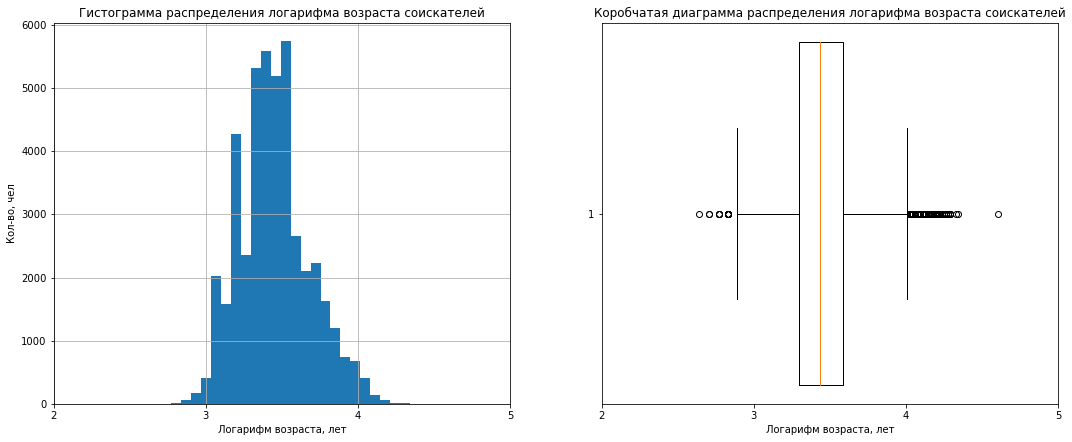

In [379]:
# Гистограмма распределения логарифма ЗП соискателей (в рублях)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,7))

axes[0].hist(
    x=np.log(hh_df['Возраст']),
    label='Логарифм возраста',
    bins=30
)
axes[0].set_xticks(range(2, 6, 1))
axes[0].set_title('Гистограмма распределения логарифма возраста соискателей')
axes[0].set_xlabel('Логарифм возраста, лет')
axes[0].set_ylabel('Кол-во, чел')
axes[0].grid()

# Коробчатая диаграмма распределения логарифма ЗП соискателей (в рублях)
axes[1].boxplot(
    np.log(hh_df['Возраст']),
    vert=False,
    widths=0.9
)
axes[1].set_xticks(range(2, 6, 1))
axes[1].set_title('Коробчатая диаграмма распределения логарифма возраста соискателей')
axes[1].set_xlabel('Логарифм возраста, лет');

In [380]:
# Создаим функцию для поиска выбросов методом z-отклонений
def outliers_z_score_log(data, feature, left=3, right=3):
    x = np.log(data[feature])
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


# Применим функцию к признаку "Возраст" 
outliers, cleaned = outliers_z_score_log(hh_clean, 'Возраст', left=3, right=4)
print('Число выбросов равно', outliers.shape[0])

# Удалим найденные выбросы
hh_final = hh_clean.drop(outliers.index, axis=0)

Число выбросов равно 3


## Распределение имеет левостороннюю асимметрию. При подсчете выбросов сместил границу на одну сигму вправо. Число выбросов по признаку возраста составило 3